In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('695_finalproject_data.csv')

**Check how the trend of music evolves throughout the years**

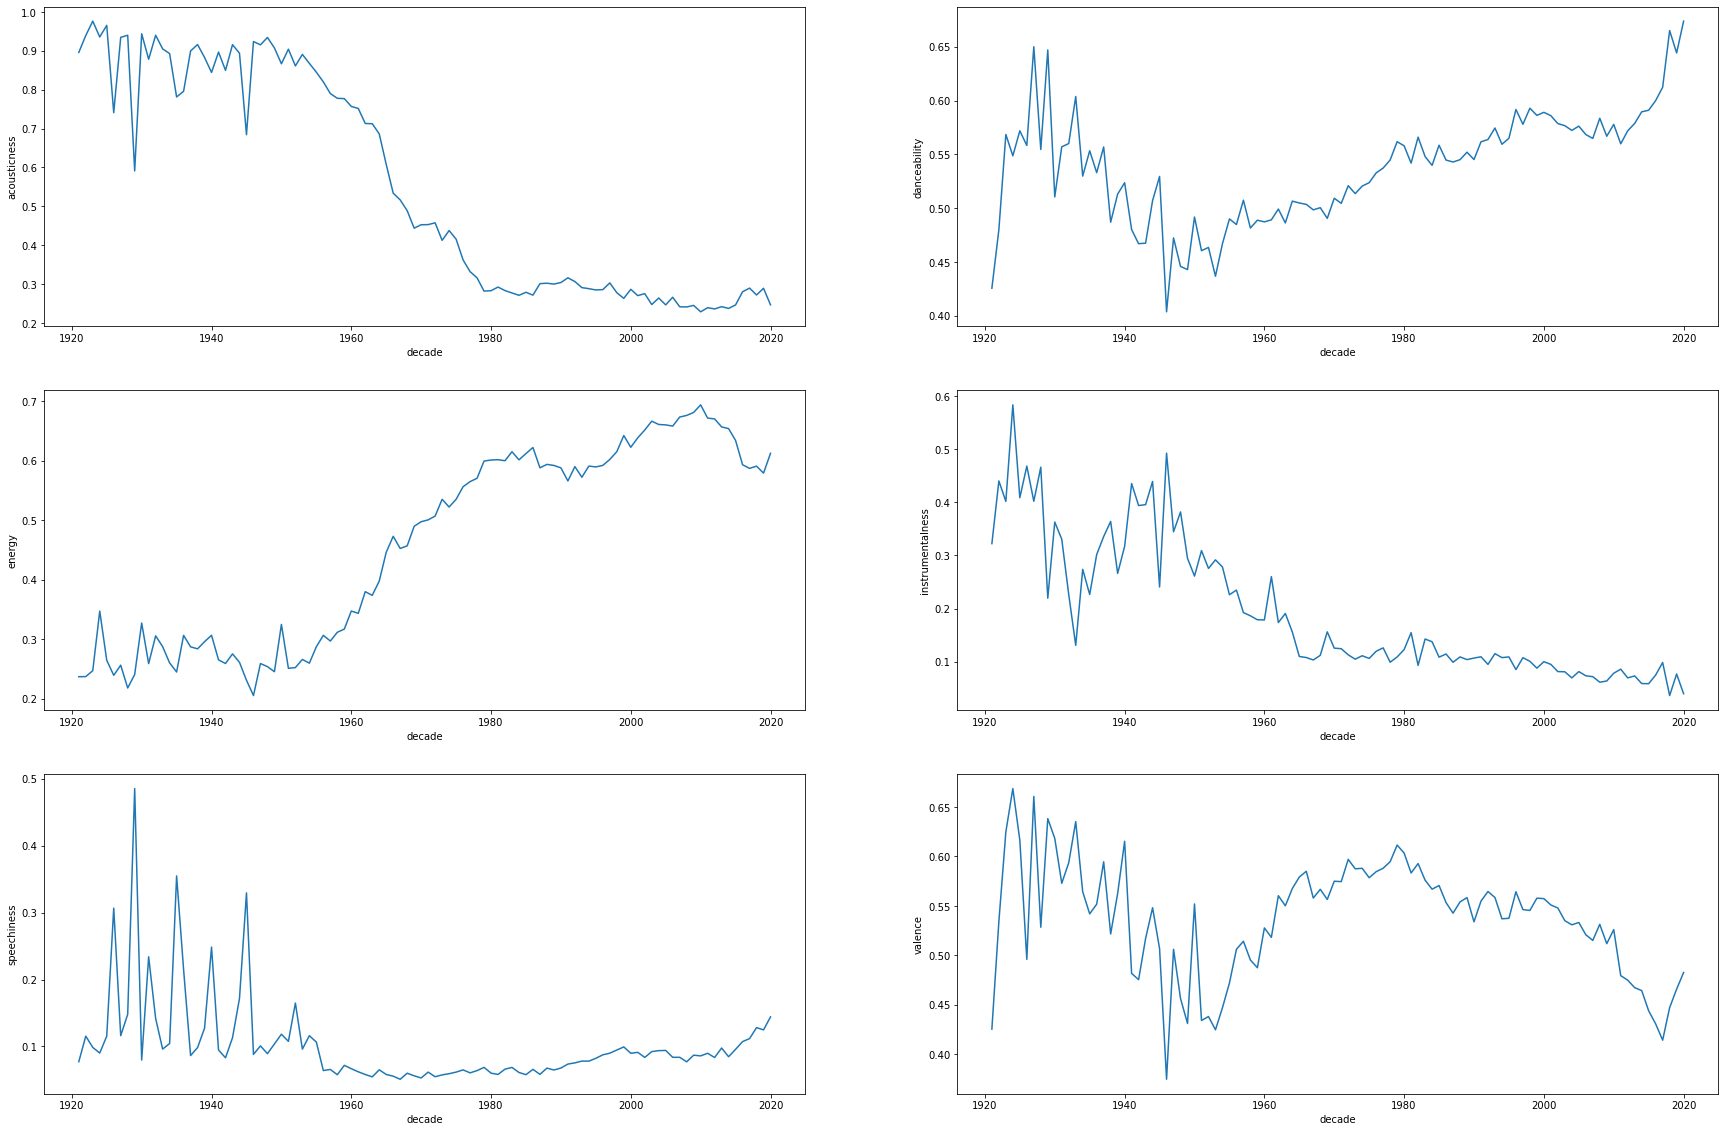

In [5]:
sp1, elements = plt.subplots(3, 2) # Initiate the subplots

arrElements = ["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]
row = 0
col = 0

for elem in arrElements: # Produce a line graph for each musical element
    data.groupby("year")[elem].mean().plot(ax=elements[row][col], figsize=(30,20)) # Group rows by year and get the mean values for that particular element
    elements[row][col].set_xlabel("decade")
    elements[row][col].set_ylabel(elem)
    if col == 0:
        col = 1
    elif row == 0 and col == 1:
        row = 1
        col = 0
    elif row == 1 and col == 1:
        row = 2
        col = 0

Explore the relationship between music elements and mode-key combination


In [6]:
df = data.groupby(["mode", "key"]).agg("mean")
for i in range(2): # Loop through each unique value for the mode variable
    mode_df = data.query("mode == @i") # Filter df to only contain tracks of the present mode
    for j in range (12): # Loop through each unique value for key variable
        modekey_df = mode_df.query("key == @j") # Filter df to only contain tracks of the present key, partnered with the present mode acquired in the parent loop

mode_key = []
for i in range(2):
  for j in range(12):
    mode_key.append(str(i)+"_"+str(j))

df.insert(loc=0, column="count", value=data.groupby(["mode", "key"]).size())
df.insert(loc=0,column="mode-key",value =mode_key)
df

mode-key  count    duration_ms         year  acousticness  \
mode key                                                             
0    0        0_0   4104  241814.671296  1974.005604      0.575527   
     1        0_1   3353  230051.904265  1986.000000      0.375331   
     2        0_2   4081  240866.542514  1972.367557      0.584801   
     3        0_3   1577  229016.937857  1973.753963      0.530122   
     4        0_4   5533  247604.153985  1980.461594      0.428093   
     5        0_5   5515  243508.683953  1975.594923      0.515105   
     6        0_6   3598  235844.335464  1985.150639      0.363554   
     7        0_7   4038  239005.468549  1973.505696      0.592619   
     8        0_8   1964  234352.020876  1981.846232      0.459607   
     9        0_9   5640  241023.910638  1978.332092      0.464635   
     10      0_10   4224  251929.951705  1980.149148      0.412953   
     11      0_11   5676  234933.035412  1982.604827      0.328354   
1    0        1_0  17325  228432.836364  1976.763232      0.490800   
     1        1_1   9419  234001.164455  1980.452914      0.443476   
     2        1_2  14676  233158.623808  1979.226288      0.439596   
     3        1_3   5559  225865.283864  1967.269653      0.706653   
     4        1_4   7339  220946.767680  1978.033792      0.494523   
     5        1_5  10762  226203.864337  1972.187883      0.602216   
     6        1_6   4951  225796.030297  1979.122400      0.479272   
     7        1_7  16655  225998.055359  1977.762774      0.465503   
     8        1_8   8702  229606.200758  1975.144909      0.549105   
     9        1_9  11940  226481.263400  1979.177303      0.427484   
     10      1_10   7758  222306.331915  1971.620263      0.636513   
     11      1_11   4871  229325.944980  1981.240608      0.454613   

          danceability    energy  instrumentalness  liveness   loudness  \
mode key                                                                  
0    0        0.527936  0.433967          0.216107  0.198846 -12.281273   
     1        0.569423  0.570454          0.150113  0.200633 -10.056370   
     2        0.506301  0.434437          0.225921  0.198014 -12.414224   
     3        0.535558  0.472635          0.193457  0.201049 -11.640042   
     4        0.526600  0.531172          0.174632  0.212854 -11.026183   
     5        0.559677  0.481850          0.184115  0.207433 -11.512655   
     6        0.578844  0.566342          0.133159  0.211415 -10.067949   
     7        0.530618  0.439735          0.218545  0.199470 -11.997616   
     8        0.568026  0.521587          0.183861  0.200716 -10.763674   
     9        0.539649  0.499157          0.179010  0.191066 -11.417224   
     10       0.588256  0.527620          0.169239  0.208416 -11.054968   
     11       0.585157  0.570780          0.123233  0.222596 -10.384183   
1    0        0.539512  0.477037          0.148532  0.211026 -11.485170   
     1        0.560154  0.498222          0.155239  0.201057 -11.199615   
     2        0.530761  0.523933          0.142781  0.212671 -10.904652   
     3        0.491725  0.374665          0.216881  0.188778 -12.828672   
     4        0.526653  0.499220          0.136393  0.216277 -11.150782   
     5        0.519747  0.426832          0.178815  0.206187 -12.241275   
     6        0.543690  0.495624          0.155391  0.202699 -11.102518   
     7        0.543025  0.496877          0.141700  0.218424 -11.315423   
     8        0.531526  0.461450          0.169538  0.190030 -11.565622   
     9        0.532421  0.540750          0.125746  0.208310 -10.567112   
     10       0.520644  0.414103          0.171062  0.195922 -12.155121   
     11       0.542940  0.521498          0.147061  0.214422 -10.757488   

          speechiness       tempo   valence  popularity  explicit  NumArtists  \
mode key                                                                        
0    0       0.082894  114.943113  0.502828   29.266569  0.073587    1.3774

Rank the number to find the most and least popular key_mode combination and analyze their music elements

In [7]:
df['count'].rank(ascending=False)

mode  key
0     0      18.0
      1      22.0
      2      19.0
      3      24.0
      4      13.0
      5      14.0
      6      21.0
      7      20.0
      8      23.0
      9      11.0
      10     17.0
      11     10.0
1     0       1.0
      1       6.0
      2       3.0
      3      12.0
      4       9.0
      5       5.0
      6      15.0
      7       2.0
      8       7.0
      9       4.0
      10      8.0
      11     16.0
Name: count, dtype: float64

key-mode: 0,1 (C major is the most popular):


In [8]:
print(data.query("mode == 1 and key == 0").mean())
print("------------------------------------------------")
print(data.mean())

duration_ms         228432.836364
year                  1976.763232
acousticness             0.490800
danceability             0.539512
energy                   0.477037
instrumentalness         0.148532
liveness                 0.211026
loudness               -11.485170
speechiness              0.089767
tempo                  117.596937
valence                  0.541179
mode                     1.000000
key                      0.000000
popularity              31.309149
explicit                 0.066436
NumArtists               1.302107
NameLength               4.519827
dtype: float64
------------------------------------------------
duration_ms         231434.725257
year                  1977.339230
acousticness             0.491646
danceability             0.538725
energy                   0.489606
instrumentalness         0.160446
liveness                 0.206727
loudness               -11.342429
speechiness              0.094200
tempo                  116.995304
valence           

Most of the C-major songs are in the 70s where it is danceable and energetic.